# Auswertung Hauptstudie

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

# low level stats
from scipy.stats import shapiro
from scipy.stats import ttest_ind

# easier stats
import pingouin as pg

from datetime import datetime

import chardet
import statistics

C:\Python310\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
C:\Python310\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


### Read data

In [4]:

with open("data_fsm_sustainability_2023-02-09_11-52.txt", "rb") as f:
    result = chardet.detect(f.read())
    print(f'encoding: {result}')


df = pd.read_csv('data_fsm_sustainability_2023-02-09_11-52.txt', encoding="UTF-16", delimiter='|')

df.head();
df.columns

encoding: {'encoding': 'UTF-16', 'confidence': 1.0, 'language': ''}


Index(['CASE', 'SERIAL', 'REF', 'QUESTNNR', 'MODE', 'STARTED', 'T101_01',
       'T102', 'T103', 'T104', 'T105_01', 'T201', 'T202', 'T203', 'T204',
       'T204x01', 'T204x02', 'T204x03', 'T204x04', 'T204x05', 'T204x06',
       'T204x07', 'T205', 'T205x01', 'T205x02', 'T205x03', 'T205x04',
       'T205x05', 'T206', 'T301_01', 'T301_01a', 'T301_02', 'T301_02a',
       'T301_03', 'T301_03a', 'T301_04', 'T301_04a', 'T301_05', 'T301_05a',
       'T301_06', 'T301_06a', 'T302_01', 'T401_01', 'T401_02', 'T401_03',
       'T401_08', 'T401_04', 'T401_05', 'T401_06', 'T401_07', 'T402_01',
       'T402_02', 'T402_03', 'T402_08', 'T402_04', 'T402_05', 'T402_06',
       'T402_07', 'T403_01', 'T403_02', 'T403_03', 'T403_08', 'T403_04',
       'T403_05', 'T403_06', 'T403_07', 'T404_01', 'T405_01', 'T406_01',
       'T501_01', 'TIME001', 'TIME002', 'TIME003', 'TIME004', 'TIME005',
       'TIME006', 'TIME007', 'TIME008', 'TIME_SUM', 'MAILSENT', 'LASTDATA',
       'FINISHED', 'Q_VIEWER', 'LASTPAGE', 'MA

# Auswertung Demographische Fragen

## Age

In [8]:
date_format = '%Y-%m-%d'

# get birth year of dates
birth_years = [datetime.strptime(date_string, date_format).strftime("%Y") for date_string in df['T101_01']]

current_year = datetime.now().year
ages = [current_year - int(year) for year in birth_years]

# filter invalid values where 2023 was selected as brith date
ages = list(filter(lambda x: x != 0, ages))

age_min = min(ages)
age_max = max(ages)
age_median = statistics.median(ages)
age_mean = sum(ages) / len(ages)
print(ages)
print(f'Min: {age_min}')
print(f'Max: {age_max}')
print(f'Mean: {age_mean}')
print(f'Median: {age_median}')

[26, 25, 27, 26, 26, 25, 26, 25, 24, 24, 25, 28, 24, 27, 32, 25, 24, 23, 31, 25, 29, 24, 35, 24, 28, 24, 26, 33, 25, 31, 28, 23, 25, 32, 27, 25, 26, 26, 22, 29, 27, 26, 31, 29, 21, 33, 25, 27, 26]
Min: 21
Max: 35
Mean: 26.632653061224488
Median: 26


## Geschlecht

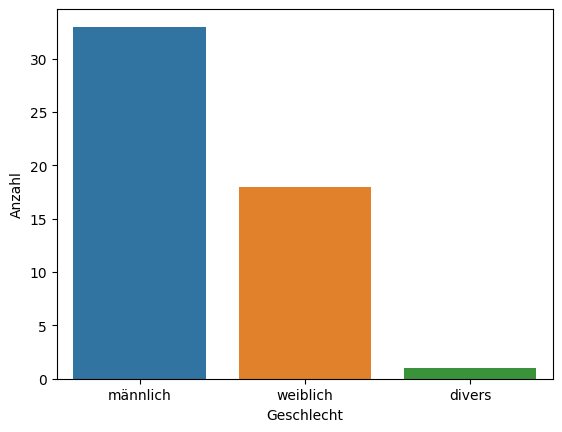

Männlich: 33
Weiblich: 18
Divers: 1


In [4]:
mapping = {1: 'männlich', 2: 'weiblich', 3: 'divers', 4: 'keine angabe'}
data_mapped = [mapping[x] for x in df['T102']]
sns.countplot(x=data_mapped)
plt.xlabel('Geschlecht')
plt.ylabel('Anzahl')
plt.show()

df['T102'].value_counts()

print("Männlich:", df['T102'].value_counts()[1])
print("Weiblich:", df['T102'].value_counts()[2])
print("Divers:", df['T102'].value_counts()[3])


## Bildungsabschluss

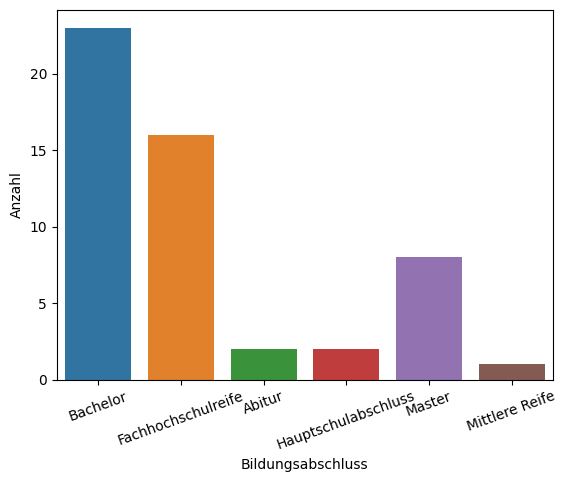

{1: 'Promotion', 2: 'Master', 3: 'Bachelor', 4: 'Abitur', 5: 'Fachhochschulreife', 6: 'Mittlere Reife', 7: 'Hauptschulabschluss', 8: 'ohne Abschluss'}


3    23
5    16
2     8
4     2
7     2
6     1
Name: T103, dtype: int64

In [5]:
mapping = {1: 'Promotion', 2: 'Master', 3: 'Bachelor', 4: 'Abitur', 5: 'Fachhochschulreife', 6: 'Mittlere Reife', 7: 'Hauptschulabschluss', 8: 'ohne Abschluss'}
data_mapped = [mapping[x] for x in df['T103']]
sns.countplot(x=data_mapped)
plt.xlabel('Bildungsabschluss')
plt.xticks(rotation=20)
plt.ylabel('Anzahl')
plt.show()

print(mapping)
df['T103'].value_counts()

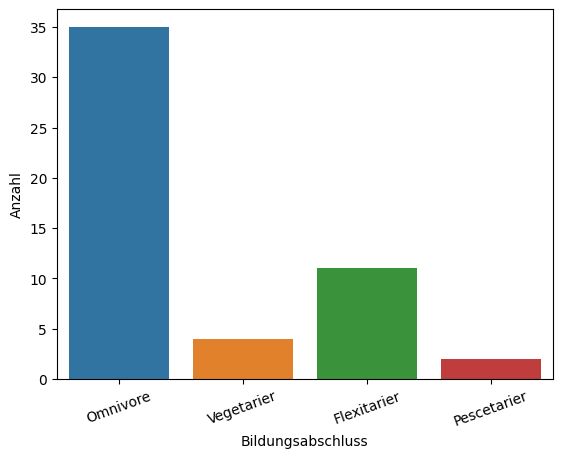

{1: 'Omnivore', 2: 'Vegetarier', 3: 'Veganer', 4: 'Pescetarier', 5: 'Frutarier', 6: 'Flexitarier', 7: 'Nicht aufgelistet'}


1    35
6    11
2     4
4     2
Name: T104, dtype: int64

In [6]:
mapping = {1: 'Omnivore', 2: 'Vegetarier', 3: 'Veganer', 4: 'Pescetarier', 5: 'Frutarier', 6: 'Flexitarier', 7: 'Nicht aufgelistet'}
data_mapped = [mapping[x] for x in df['T104']]
sns.countplot(x=data_mapped)
plt.xlabel('Bildungsabschluss')
plt.xticks(rotation=20)
plt.ylabel('Anzahl')
plt.show()
print(mapping)
df['T104'].value_counts()

# Auswertung Selbsteinschätzung

## Wissen

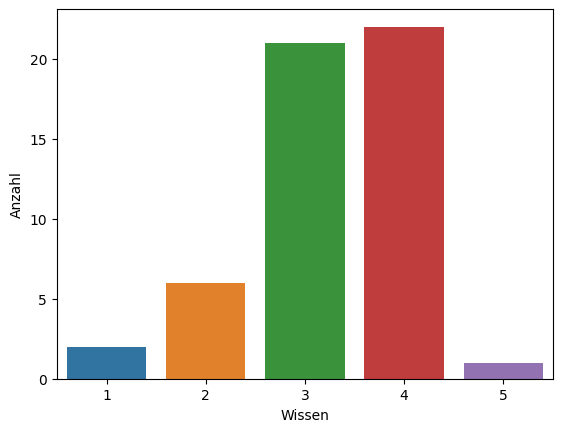

4    22
3    21
2     6
1     2
5     1
Name: T201, dtype: int64
Standardabweichung: 0.8428565950498368
Median: 3.0
Durchschnitt: 3.269230769230769


In [26]:
sns.countplot(x=df['T201'])
plt.xlabel('Wissen')
plt.ylabel('Anzahl')
plt.show()

print(df['T201'].value_counts())
print("Standardabweichung:", statistics.stdev(df['T201']))
print("Median:", statistics.median(df['T201']))
print("Durchschnitt:", statistics.mean(df['T201']))

## Im-Laden-Kaufverhalten

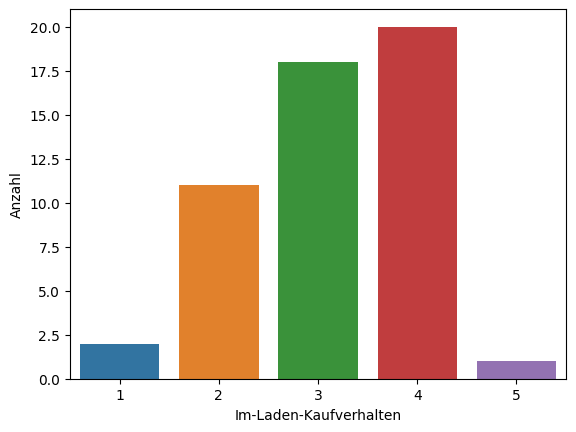

Standardabweichung: 0.9081082718950219
Median: 3.0
Durchschnitt: 3.1346153846153846


In [27]:
values = df['T202']
sns.countplot(x=values)
plt.xlabel('Im-Laden-Kaufverhalten')
plt.ylabel('Anzahl')
plt.show()
values.value_counts()
print("Standardabweichung:", statistics.stdev(values))
print("Median:", statistics.median(values))
print("Durchschnitt:", statistics.mean(values))

## Online-Kaufverhalten

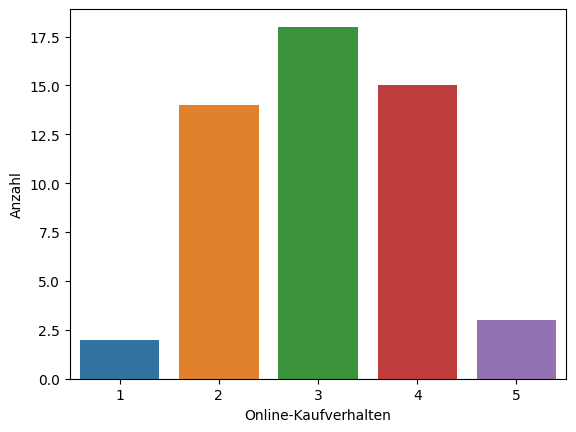

Standardabweichung: 0.9784634119716072
Median: 3.0
Durchschnitt: 3.0576923076923075


In [28]:
values = df['T203']
sns.countplot(x=values)
plt.xlabel('Online-Kaufverhalten')
plt.ylabel('Anzahl')
plt.show()
print(values.value_counts())
print("Standardabweichung:", statistics.stdev(values))
print("Median:", statistics.median(values))
print("Durchschnitt:", statistics.mean(values))

## Konsumenten-Typ

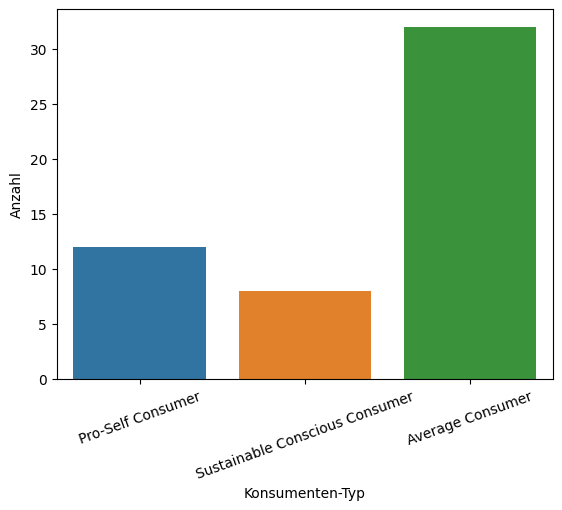

{1: 'Pro-Self Consumer', 2: 'Average Consumer', 3: 'Sustainable Conscious Consumer'}
2    32
1    12
3     8
Name: T206, dtype: int64


In [30]:
values = df['T206']
mapping = {1: 'Pro-Self Consumer', 2: 'Average Consumer', 3: 'Sustainable Conscious Consumer'}
data_mapped = [mapping[x] for x in values]
sns.countplot(x=data_mapped)
plt.xlabel('Konsumenten-Typ')
plt.xticks(rotation=20)
plt.ylabel('Anzahl')
plt.show()
print(mapping)
print(values.value_counts())

# Designvarianten

## Ohne Label & Nachhaltigkeitsampel

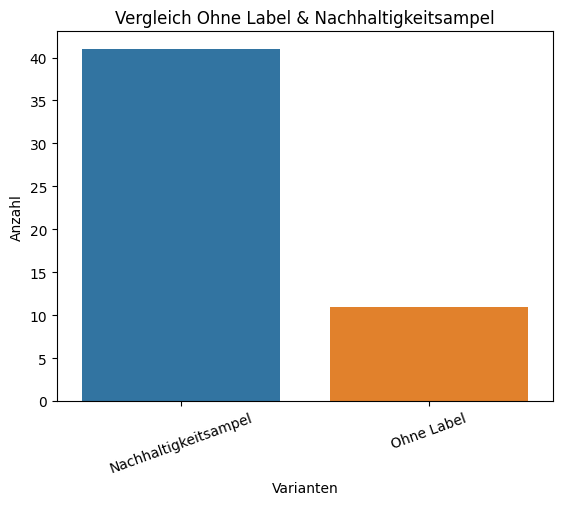

{1: 'Ohne Label', 2: 'Nachhaltigkeitsampel'}
2    41
1    11
Name: T301_01, dtype: int64
Reaktionszeit Durchschnitt: 16063.038461538461 ms
Reaktionszeit Mittelwert: 9280.0 ms
Reaktionszeit Min: 1438 ms
Reaktionszeit Max: 83377 ms


In [47]:
values = df['T301_01']
mapping = {1: 'Ohne Label', 2: 'Nachhaltigkeitsampel'}
data_mapped = [mapping[x] for x in values]
sns.countplot(x=data_mapped)
plt.xlabel('Varianten')
plt.xticks(rotation=20)
plt.ylabel('Anzahl')
plt.title("Vergleich Ohne Label & Nachhaltigkeitsampel")
plt.show()
print(mapping)
print(values.value_counts())

reaction_time = df['T301_01a']
print(f'Reaktionszeit Durchschnitt: {reaction_time.mean()} ms')
print(f'Reaktionszeit Mittelwert: {reaction_time.median()} ms')
print(f'Reaktionszeit Min: {reaction_time.min()} ms')
print(f'Reaktionszeit Max: {reaction_time.max()} ms')

## Ohne Label & Nachhaltigkeitsübersicht

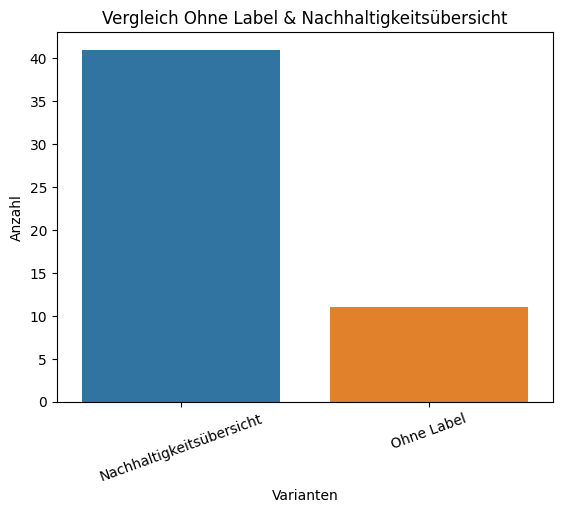

{1: 'Ohne Label', 2: 'Nachhaltigkeitsübersicht'}
2    41
1    11
Name: T301_02, dtype: int64
Reaktionszeit Durchschnitt: 15468.25 ms
Reaktionszeit Mittelwert: 9071.5 ms
Reaktionszeit Min: 1390 ms
Reaktionszeit Max: 50488 ms


In [46]:
values = df['T301_02']
mapping = {1: 'Ohne Label', 2: 'Nachhaltigkeitsübersicht'}
data_mapped = [mapping[x] for x in values]
sns.countplot(x=data_mapped)
plt.xlabel('Varianten')
plt.xticks(rotation=20)
plt.ylabel('Anzahl')
plt.title("Vergleich Ohne Label & Nachhaltigkeitsübersicht")
plt.show()
print(mapping)
print(values.value_counts())

reaction_time = df['T301_02a']
print(f'Reaktionszeit Durchschnitt: {reaction_time.mean()} ms')
print(f'Reaktionszeit Mittelwert: {reaction_time.median()} ms')
print(f'Reaktionszeit Min: {reaction_time.min()} ms')
print(f'Reaktionszeit Max: {reaction_time.max()} ms')

## Ohne Label & Labelanpassung

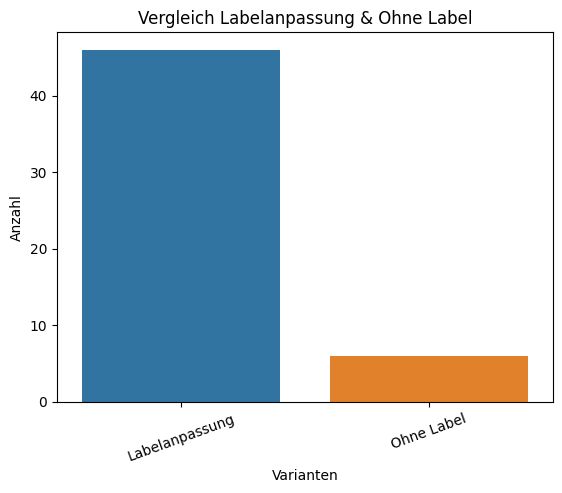

{1: 'Ohne Label', 2: 'Labelanpassung'}
2    46
1     6
Name: T301_03, dtype: int64
Reaktionszeit Durchschnitt: 10931.903846153846 ms
Reaktionszeit Mittelwert: 7624.0 ms
Reaktionszeit Min: 552 ms
Reaktionszeit Max: 73512 ms


In [41]:
values = df['T301_03']
mapping = {1: 'Ohne Label', 2: 'Labelanpassung'}
data_mapped = [mapping[x] for x in values]
sns.countplot(x=data_mapped)
plt.xlabel('Varianten')
plt.xticks(rotation=20)
plt.ylabel('Anzahl')
plt.title("Vergleich Labelanpassung & Ohne Label")
plt.show()
print(mapping)
print(values.value_counts())

reaction_time = df['T301_03a']
print(f'Reaktionszeit Durchschnitt: {reaction_time.mean()} ms')
print(f'Reaktionszeit Mittelwert: {reaction_time.median()} ms')
print(f'Reaktionszeit Min: {reaction_time.min()} ms')
print(f'Reaktionszeit Max: {reaction_time.max()} ms')

## Nachhaltigkeitsampel & Nachhaltigkeitsübersicht

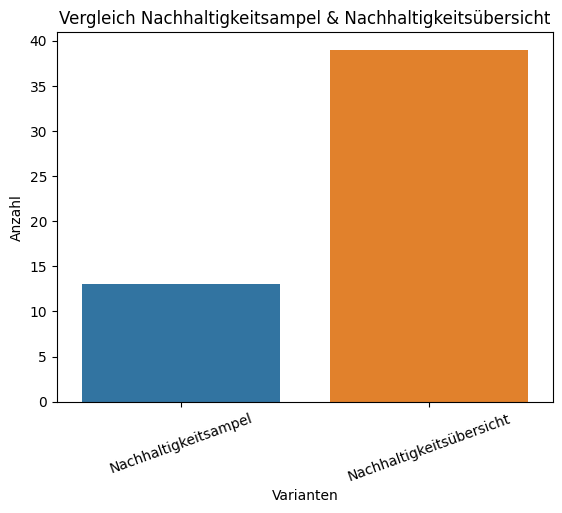

{1: 'Nachhaltigkeitsampel', 2: 'Nachhaltigkeitsübersicht'}
2    39
1    13
Name: T301_04, dtype: int64
Reaktionszeit Durchschnitt: 15001.884615384615 ms
Reaktionszeit Mittelwert: 7611.0 ms
Reaktionszeit Min: 563 ms
Reaktionszeit Max: 82785 ms


In [48]:
values = df['T301_04']
mapping = {1: 'Nachhaltigkeitsampel', 2: 'Nachhaltigkeitsübersicht'}
data_mapped = [mapping[x] for x in values]
sns.countplot(x=data_mapped)
plt.xlabel('Varianten')
plt.xticks(rotation=20)
plt.ylabel('Anzahl')
plt.title("Vergleich Nachhaltigkeitsampel & Nachhaltigkeitsübersicht")
plt.show()
print(mapping)
print(values.value_counts())

reaction_time = df['T301_04a']
print(f'Reaktionszeit Durchschnitt: {reaction_time.mean()} ms')
print(f'Reaktionszeit Mittelwert: {reaction_time.median()} ms')
print(f'Reaktionszeit Min: {reaction_time.min()} ms')
print(f'Reaktionszeit Max: {reaction_time.max()} ms')

## Nachhaltigkeitsampel & Labelanpassung

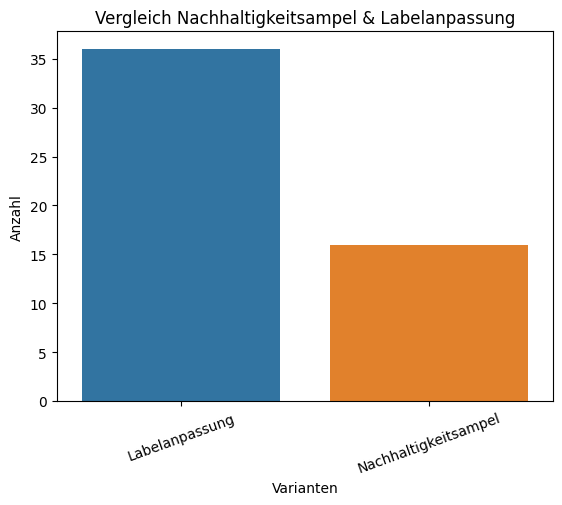

{1: 'Nachhaltigkeitsampel', 2: 'Labelanpassung'}
2    36
1    16
Name: T301_05, dtype: int64
Reaktionszeit Durchschnitt: 32742.26923076923 ms
Reaktionszeit Mittelwert: 11366.0 ms
Reaktionszeit Min: 1100 ms
Reaktionszeit Max: 756890 ms


In [44]:
values = df['T301_05']
mapping = {1: 'Nachhaltigkeitsampel', 2: 'Labelanpassung'}
data_mapped = [mapping[x] for x in values]
sns.countplot(x=data_mapped)
plt.xlabel('Varianten')
plt.xticks(rotation=20)
plt.ylabel('Anzahl')
plt.title("Vergleich Nachhaltigkeitsampel & Labelanpassung")
plt.show()
print(mapping)
print(values.value_counts())

reaction_time = df['T301_05a']
print(f'Reaktionszeit Durchschnitt: {reaction_time.mean()} ms')
print(f'Reaktionszeit Mittelwert: {reaction_time.median()} ms')
print(f'Reaktionszeit Min: {reaction_time.min()} ms')
print(f'Reaktionszeit Max: {reaction_time.max()} ms')

## Nachhaltigkeitsübersicht & Labelanpassung

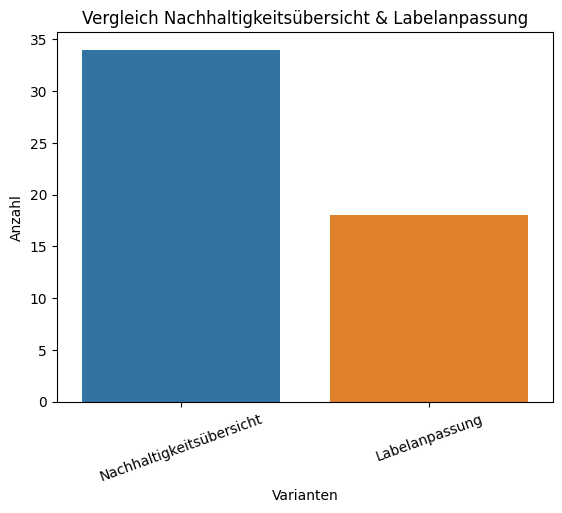

{1: 'Nachhaltigkeitsübersicht', 2: 'Labelanpassung'}
1    34
2    18
Name: T301_06, dtype: int64
Reaktionszeit Durchschnitt: 22871.634615384617 ms
Reaktionszeit Mittelwert: 12926.0 ms
Reaktionszeit Min: 1353 ms
Reaktionszeit Max: 134202 ms


In [45]:
values = df['T301_06']
mapping = {1: 'Nachhaltigkeitsübersicht', 2: 'Labelanpassung'}
data_mapped = [mapping[x] for x in values]
sns.countplot(x=data_mapped)
plt.xlabel('Varianten')
plt.xticks(rotation=20)
plt.ylabel('Anzahl')
plt.title("Vergleich Nachhaltigkeitsübersicht & Labelanpassung")
plt.show()
print(mapping)
print(values.value_counts())

reaction_time = df['T301_06a']
print(f'Reaktionszeit Durchschnitt: {reaction_time.mean()} ms')
print(f'Reaktionszeit Mittelwert: {reaction_time.median()} ms')
print(f'Reaktionszeit Min: {reaction_time.min()} ms')
print(f'Reaktionszeit Max: {reaction_time.max()} ms')

# Label-Einschätzung

## Nachhaltigkeitsampel

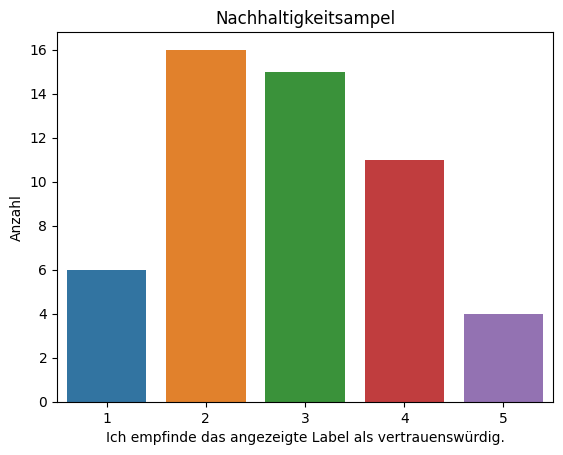

2    16
3    15
4    11
1     6
5     4
Name: T401_01, dtype: int64
Mittelwert: 3.0
Durchschnitt: 2.826923076923077
Standardabweichung: 1.1327764579875146


In [90]:
values = df['T401_01']
sns.countplot(x=values)
plt.xlabel('Ich empfinde das angezeigte Label als vertrauenswürdig.')
plt.ylabel('Anzahl')
plt.title("Nachhaltigkeitsampel")
plt.show()
print(values.value_counts())
print("Mittelwert:", statistics.median(values))
print("Durchschnitt:", statistics.mean(values))
print("Standardabweichung:", statistics.stdev(values))

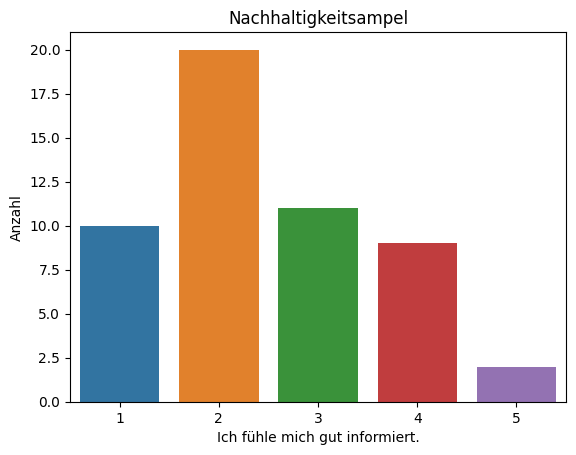

2    20
3    11
1    10
4     9
5     2
Name: T401_02, dtype: int64
Mittelwert: 2.0
Durchschnitt: 2.480769230769231
Standardabweichung: 1.111268214132202


In [91]:
values = df['T401_02']
sns.countplot(x=values)
plt.xlabel('Ich fühle mich gut informiert.')
plt.ylabel('Anzahl')
plt.title("Nachhaltigkeitsampel")
plt.show()
print(values.value_counts())
print("Mittelwert:", statistics.median(values))
print("Durchschnitt:", statistics.mean(values))
print("Standardabweichung:", statistics.stdev(values))

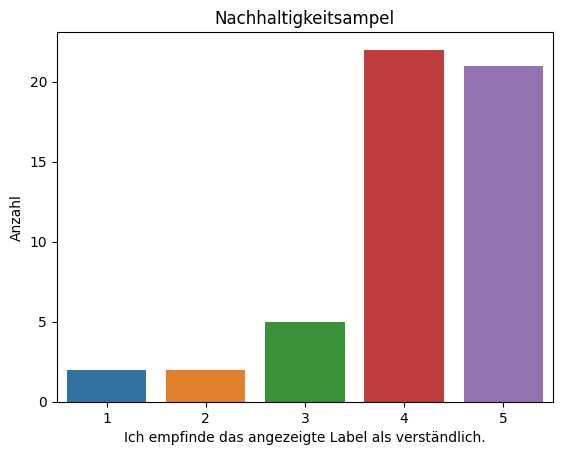

4    22
5    21
3     5
2     2
1     2
Name: T401_03, dtype: int64
Mittelwert: 4.0
Durchschnitt: 4.115384615384615
Standardabweichung: 1.0030120550141812


In [94]:
values = df['T401_03']
sns.countplot(x=values)
plt.xlabel('Ich empfinde das angezeigte Label als verständlich.')
plt.ylabel('Anzahl')
plt.title("Nachhaltigkeitsampel")
plt.show()
print(values.value_counts())
print("Mittelwert:", statistics.median(values))
print("Durchschnitt:", statistics.mean(values))
print("Standardabweichung:", statistics.stdev(values))

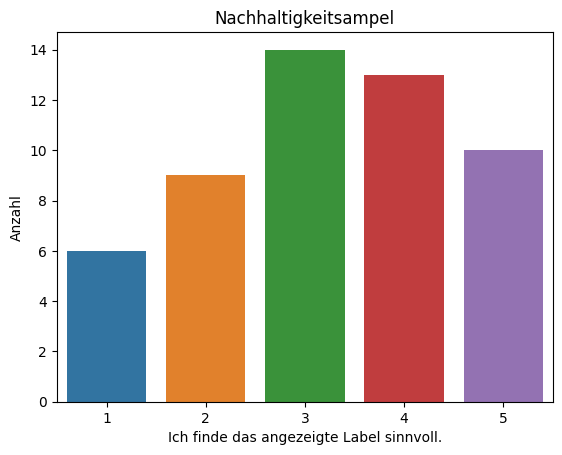

3    14
4    13
5    10
2     9
1     6
Name: T401_04, dtype: int64
Mittelwert: 3.0
Durchschnitt: 3.230769230769231
Standardabweichung: 1.2774881084651961


In [95]:
values = df['T401_04']
sns.countplot(x=values)
plt.xlabel('Ich finde das angezeigte Label sinnvoll.')
plt.ylabel('Anzahl')
plt.title("Nachhaltigkeitsampel")
plt.show()
print(values.value_counts())
print("Mittelwert:", statistics.median(values))
print("Durchschnitt:", statistics.mean(values))
print("Standardabweichung:", statistics.stdev(values))

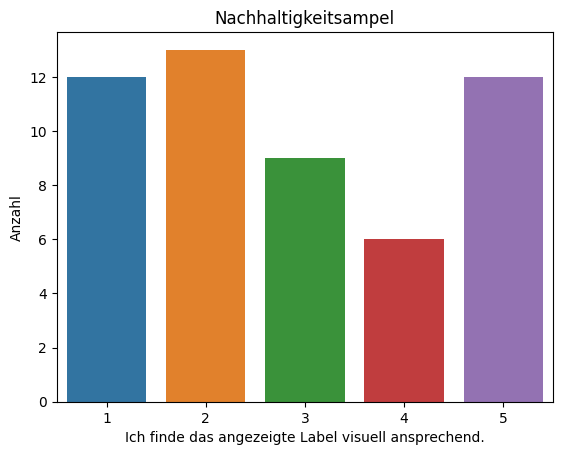

2    13
5    12
1    12
3     9
4     6
Name: T401_05, dtype: int64
Mittelwert: 3.0
Durchschnitt: 2.8653846153846154
Standardabweichung: 1.4954682675892912


In [96]:
values = df['T401_05']
sns.countplot(x=values)
plt.xlabel('Ich finde das angezeigte Label visuell ansprechend.')
plt.ylabel('Anzahl')
plt.title("Nachhaltigkeitsampel")
plt.show()
print(values.value_counts())
print("Mittelwert:", statistics.median(values))
print("Durchschnitt:", statistics.mean(values))
print("Standardabweichung:", statistics.stdev(values))

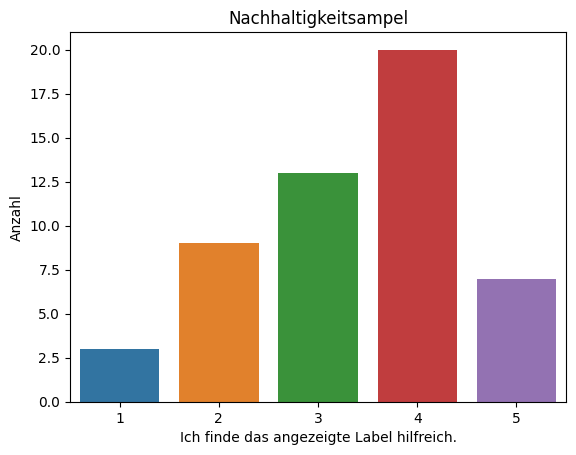

4    20
3    13
2     9
5     7
1     3
Name: T401_06, dtype: int64
Mittelwert: 4.0
Durchschnitt: 3.3653846153846154
Standardabweichung: 1.1030945092009392


In [97]:
values = df['T401_06']
sns.countplot(x=values)
plt.xlabel('Ich finde das angezeigte Label hilfreich.')
plt.ylabel('Anzahl')
plt.title("Nachhaltigkeitsampel")
plt.show()
print(values.value_counts())
print("Mittelwert:", statistics.median(values))
print("Durchschnitt:", statistics.mean(values))
print("Standardabweichung:", statistics.stdev(values))

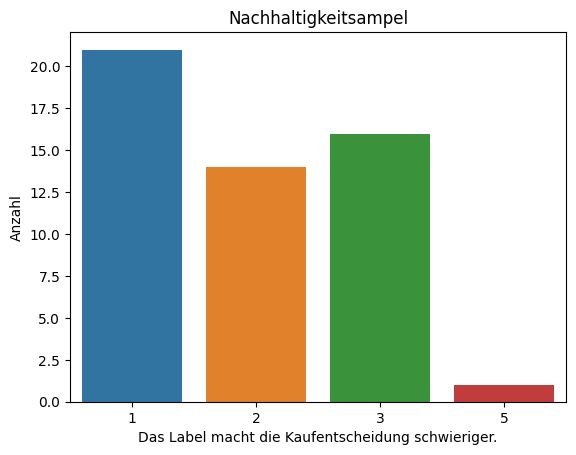

1    21
3    16
2    14
5     1
Name: T401_07, dtype: int64
Mittelwert: 2.0
Durchschnitt: 1.9615384615384615
Standardabweichung: 0.9489217505610159


In [98]:
values = df['T401_07']
sns.countplot(x=values)
plt.xlabel('Das Label macht die Kaufentscheidung schwieriger.')
plt.ylabel('Anzahl')
plt.title("Nachhaltigkeitsampel")
plt.show()
print(values.value_counts())
print("Mittelwert:", statistics.median(values))
print("Durchschnitt:", statistics.mean(values))
print("Standardabweichung:", statistics.stdev(values))

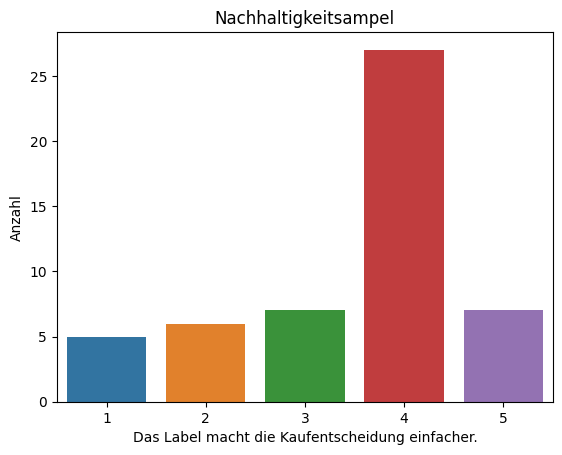

4    27
5     7
3     7
2     6
1     5
Name: T401_08, dtype: int64
Mittelwert: 4.0
Durchschnitt: 3.480769230769231
Standardabweichung: 1.1629978944796515


In [99]:
values = df['T401_08']
sns.countplot(x=values)
plt.xlabel('Das Label macht die Kaufentscheidung einfacher.')
plt.ylabel('Anzahl')
plt.title("Nachhaltigkeitsampel")
plt.show()
print(values.value_counts())
print("Mittelwert:", statistics.median(values))
print("Durchschnitt:", statistics.mean(values))
print("Standardabweichung:", statistics.stdev(values))

## Nachhaltigkeitsübersicht

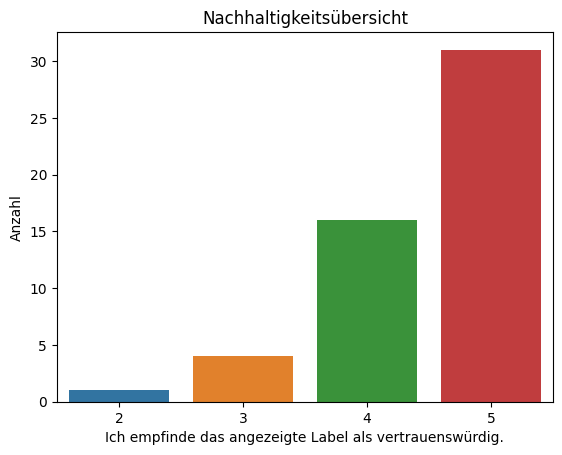

5    31
4    16
3     4
2     1
Name: T402_01, dtype: int64
Mittelwert: 5.0
Durchschnitt: 4.480769230769231
Standardabweichung: 0.7273477096955738


In [100]:
values = df['T402_01']
sns.countplot(x=values)
plt.xlabel('Ich empfinde das angezeigte Label als vertrauenswürdig.')
plt.ylabel('Anzahl')
plt.title("Nachhaltigkeitsübersicht")
plt.show()
print(values.value_counts())
print("Mittelwert:", statistics.median(values))
print("Durchschnitt:", statistics.mean(values))
print("Standardabweichung:", statistics.stdev(values))

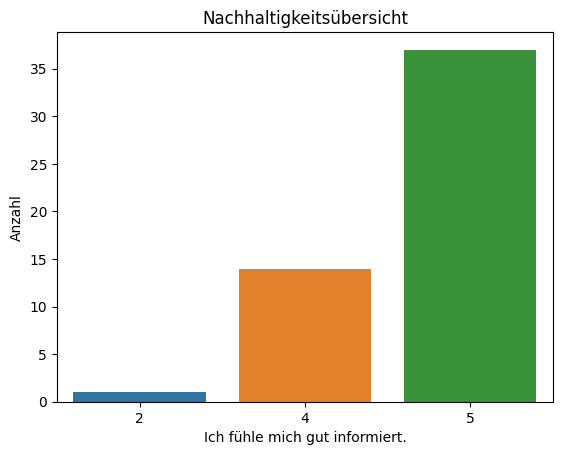

5    37
4    14
2     1
Name: T402_02, dtype: int64
Mittelwert: 5.0
Durchschnitt: 4.673076923076923
Standardabweichung: 0.5848128189279915


In [101]:
values = df['T402_02']
sns.countplot(x=values)
plt.xlabel('Ich fühle mich gut informiert.')
plt.ylabel('Anzahl')
plt.title("Nachhaltigkeitsübersicht")
plt.show()
print(values.value_counts())
print("Mittelwert:", statistics.median(values))
print("Durchschnitt:", statistics.mean(values))
print("Standardabweichung:", statistics.stdev(values))

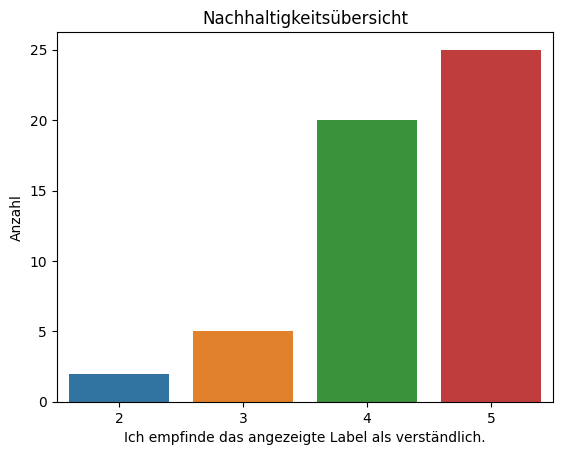

5    25
4    20
3     5
2     2
Name: T402_03, dtype: int64
Mittelwert: 4.0
Durchschnitt: 4.3076923076923075
Standardabweichung: 0.80533664957914


In [102]:
values = df['T402_03']
sns.countplot(x=values)
plt.xlabel('Ich empfinde das angezeigte Label als verständlich.')
plt.ylabel('Anzahl')
plt.title("Nachhaltigkeitsübersicht")
plt.show()
print(values.value_counts())
print("Mittelwert:", statistics.median(values))
print("Durchschnitt:", statistics.mean(values))
print("Standardabweichung:", statistics.stdev(values))

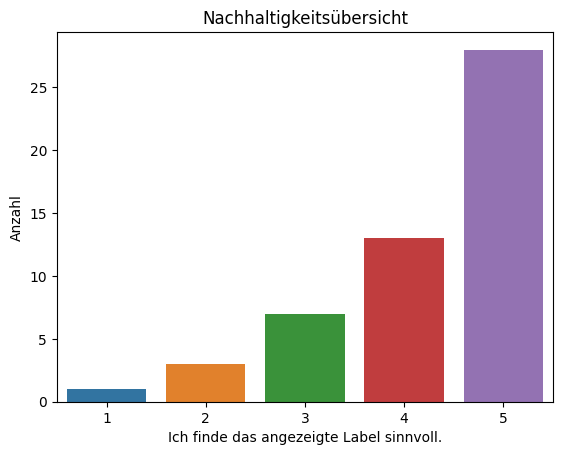

5    28
4    13
3     7
2     3
1     1
Name: T402_04, dtype: int64
Mittelwert: 5.0
Durchschnitt: 4.230769230769231
Standardabweichung: 1.0216362234926568


In [103]:
values = df['T402_04']
sns.countplot(x=values)
plt.xlabel('Ich finde das angezeigte Label sinnvoll.')
plt.ylabel('Anzahl')
plt.title("Nachhaltigkeitsübersicht")
plt.show()
print(values.value_counts())
print("Mittelwert:", statistics.median(values))
print("Durchschnitt:", statistics.mean(values))
print("Standardabweichung:", statistics.stdev(values))

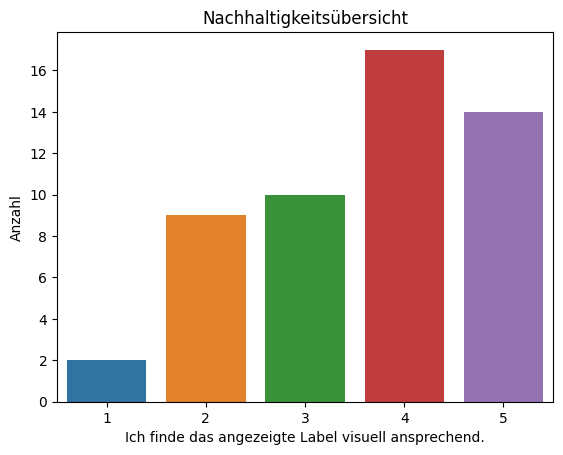

4    17
5    14
3    10
2     9
1     2
Name: T402_05, dtype: int64
Mittelwert: 4.0
Durchschnitt: 3.6153846153846154
Standardabweichung: 1.174130402515672


In [104]:
values = df['T402_05']
sns.countplot(x=values)
plt.xlabel('Ich finde das angezeigte Label visuell ansprechend.')
plt.ylabel('Anzahl')
plt.title("Nachhaltigkeitsübersicht")
plt.show()
print(values.value_counts())
print("Mittelwert:", statistics.median(values))
print("Durchschnitt:", statistics.mean(values))
print("Standardabweichung:", statistics.stdev(values))

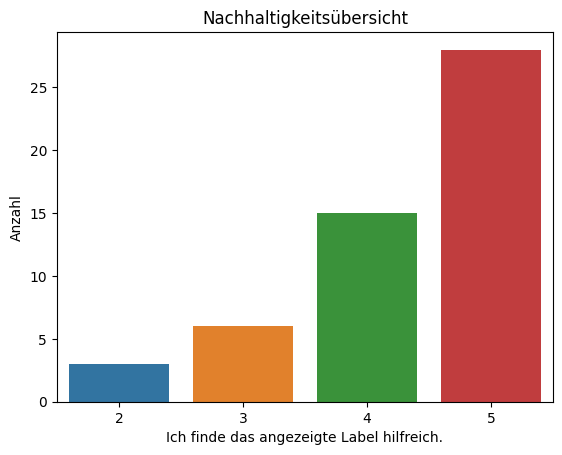

5    28
4    15
3     6
2     3
Name: T402_06, dtype: int64
Mittelwert: 5.0
Durchschnitt: 4.3076923076923075
Standardabweichung: 0.8974574442576059


In [105]:
values = df['T402_06']
sns.countplot(x=values)
plt.xlabel('Ich finde das angezeigte Label hilfreich.')
plt.ylabel('Anzahl')
plt.title("Nachhaltigkeitsübersicht")
plt.show()
print(values.value_counts())
print("Mittelwert:", statistics.median(values))
print("Durchschnitt:", statistics.mean(values))
print("Standardabweichung:", statistics.stdev(values))

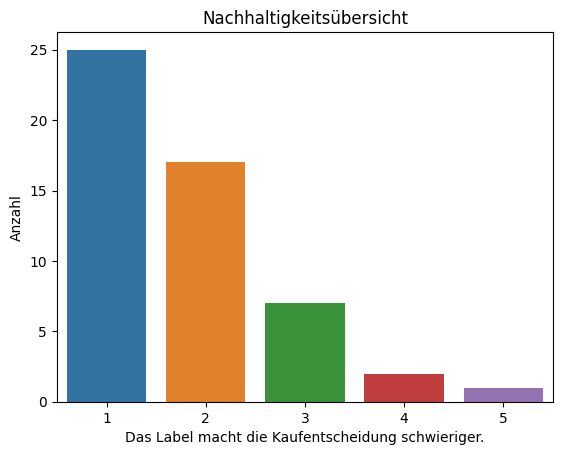

1    25
2    17
3     7
4     2
5     1
Name: T402_07, dtype: int64
Mittelwert: 2.0
Durchschnitt: 1.7884615384615385
Standardabweichung: 0.9566391017728284


In [106]:
values = df['T402_07']
sns.countplot(x=values)
plt.xlabel('Das Label macht die Kaufentscheidung schwieriger.')
plt.ylabel('Anzahl')
plt.title("Nachhaltigkeitsübersicht")
plt.show()
print(values.value_counts())
print("Mittelwert:", statistics.median(values))
print("Durchschnitt:", statistics.mean(values))
print("Standardabweichung:", statistics.stdev(values))

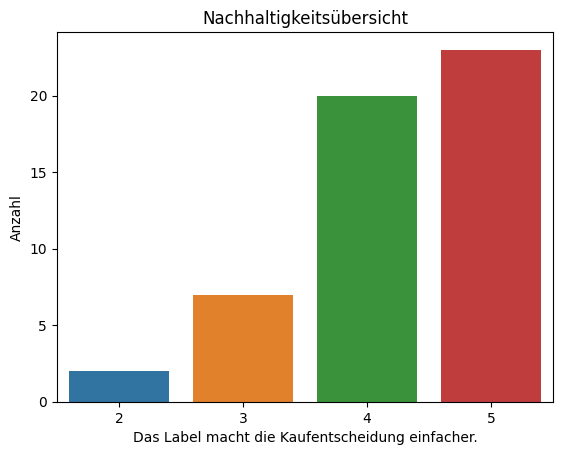

5    23
4    20
3     7
2     2
Name: T402_08, dtype: int64
Mittelwert: 4.0
Durchschnitt: 4.230769230769231
Standardabweichung: 0.8311434272625572


In [107]:
values = df['T402_08']
sns.countplot(x=values)
plt.xlabel('Das Label macht die Kaufentscheidung einfacher.')
plt.ylabel('Anzahl')
plt.title("Nachhaltigkeitsübersicht")
plt.show()
print(values.value_counts())
print("Mittelwert:", statistics.median(values))
print("Durchschnitt:", statistics.mean(values))
print("Standardabweichung:", statistics.stdev(values))

## Labelanpassung

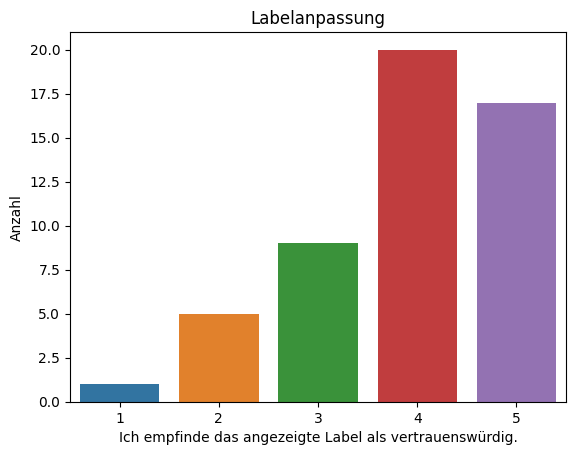

4    20
5    17
3     9
2     5
1     1
Name: T403_01, dtype: int64
Mittelwert: 4.0
Durchschnitt: 3.9038461538461537
Standardabweichung: 1.0339267502521046


In [82]:
values = df['T403_01']
sns.countplot(x=values)
plt.xlabel('Ich empfinde das angezeigte Label als vertrauenswürdig.')
plt.ylabel('Anzahl')
plt.title("Labelanpassung")
plt.show()
print(values.value_counts())
print("Mittelwert:", statistics.median(values))
print("Durchschnitt:", statistics.mean(values))
print("Standardabweichung:", statistics.stdev(values))

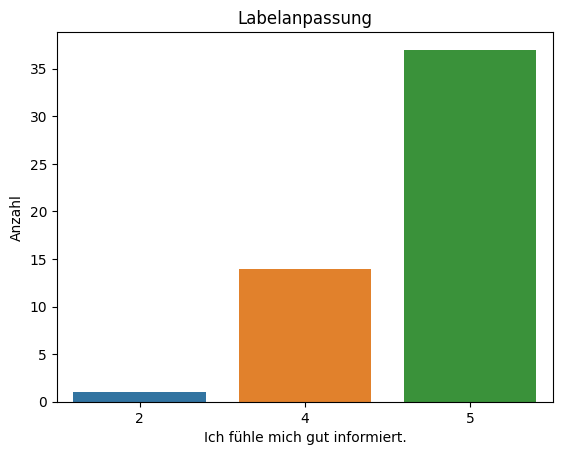

5    37
4    14
2     1
Name: T402_02, dtype: int64
Mittelwert: 5.0
Durchschnitt: 4.673076923076923
Standardabweichung: 0.5848128189279915


In [83]:
values = df['T402_02']
sns.countplot(x=values)
plt.xlabel('Ich fühle mich gut informiert.')
plt.ylabel('Anzahl')
plt.title("Labelanpassung")
plt.show()
print(values.value_counts())
print("Mittelwert:", statistics.median(values))
print("Durchschnitt:", statistics.mean(values))
print("Standardabweichung:", statistics.stdev(values))

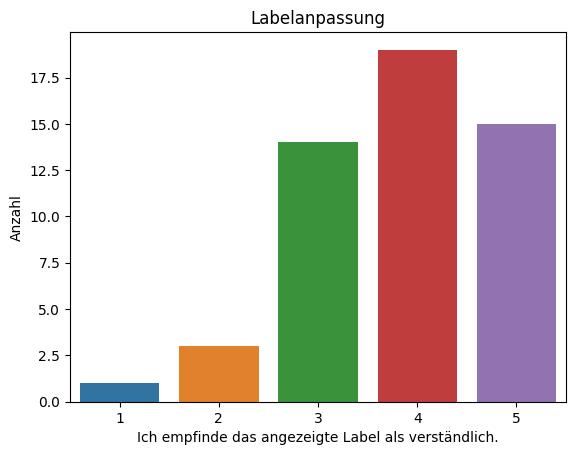

4    19
5    15
3    14
2     3
1     1
Name: T403_03, dtype: int64
Mittelwert: 4.0
Durchschnitt: 3.8461538461538463
Standardabweichung: 0.9778851808099263


In [84]:
values = df['T403_03']
sns.countplot(x=values)
plt.xlabel('Ich empfinde das angezeigte Label als verständlich.')
plt.ylabel('Anzahl')
plt.title("Labelanpassung")
plt.show()
print(values.value_counts())
print("Mittelwert:", statistics.median(values))
print("Durchschnitt:", statistics.mean(values))
print("Standardabweichung:", statistics.stdev(values))

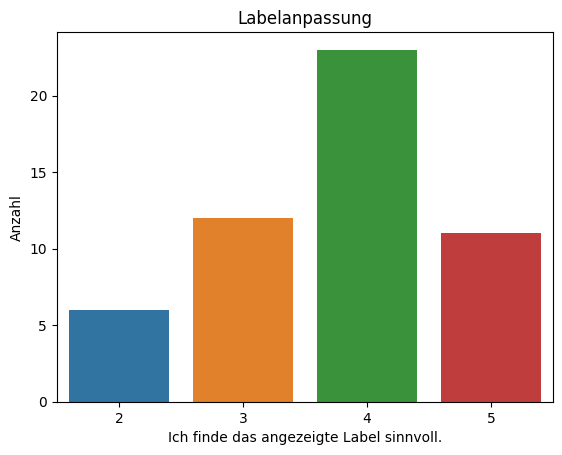

4    23
3    12
5    11
2     6
Name: T403_04, dtype: int64
Mittelwert: 4.0
Durchschnitt: 3.75
Standardabweichung: 0.9261982170436854


In [85]:
values = df['T403_04']
sns.countplot(x=values)
plt.xlabel('Ich finde das angezeigte Label sinnvoll.')
plt.ylabel('Anzahl')
plt.title("Labelanpassung")
plt.show()
print(values.value_counts())
print("Mittelwert:", statistics.median(values))
print("Durchschnitt:", statistics.mean(values))
print("Standardabweichung:", statistics.stdev(values))

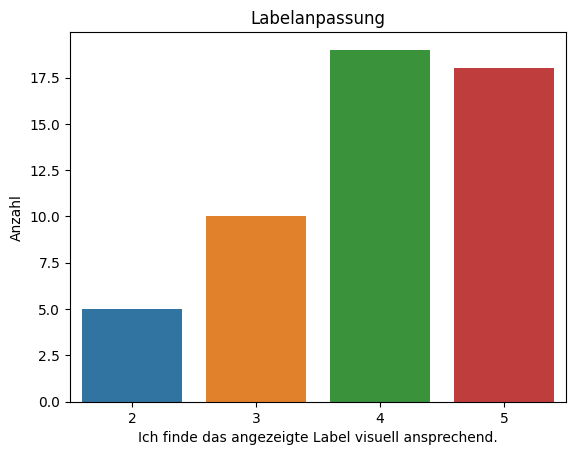

4    19
5    18
3    10
2     5
Name: T403_05, dtype: int64
Mittelwert: 4.0
Durchschnitt: 3.9615384615384617
Standardabweichung: 0.9693648306815617


In [86]:
values = df['T403_05']
sns.countplot(x=values)
plt.xlabel('Ich finde das angezeigte Label visuell ansprechend.')
plt.ylabel('Anzahl')
plt.title("Labelanpassung")
plt.show()
print(values.value_counts())
print("Mittelwert:", statistics.median(values))
print("Durchschnitt:", statistics.mean(values))
print("Standardabweichung:", statistics.stdev(values))

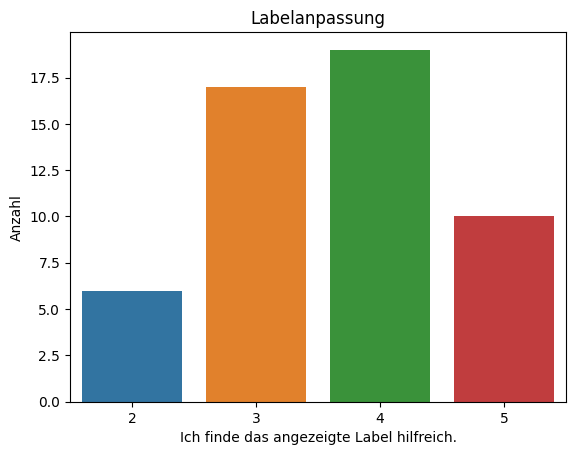

4    19
3    17
5    10
2     6
Name: T403_06, dtype: int64
Mittelwert: 4.0
Durchschnitt: 3.6346153846153846
Standardabweichung: 0.9294494713316441


In [87]:
values = df['T403_06']
sns.countplot(x=values)
plt.xlabel('Ich finde das angezeigte Label hilfreich.')
plt.ylabel('Anzahl')
plt.title("Labelanpassung")
plt.show()
print(values.value_counts())
print("Mittelwert:", statistics.median(values))
print("Durchschnitt:", statistics.mean(values))
print("Standardabweichung:", statistics.stdev(values))

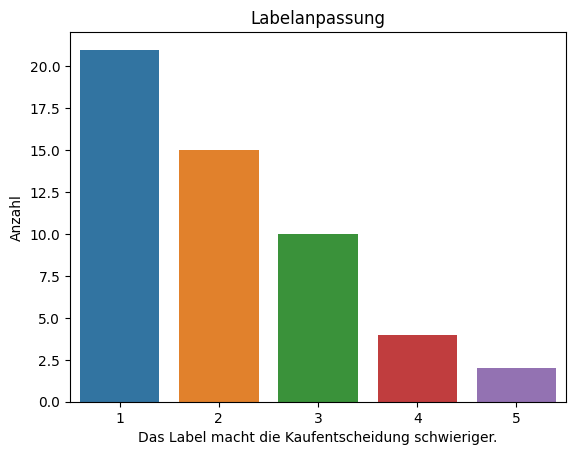

1    21
2    15
3    10
4     4
5     2
Name: T403_07, dtype: int64
Mittelwert: 2.0
Durchschnitt: 2.0576923076923075
Standardabweichung: 1.1274378647017305


In [88]:
values = df['T403_07']
sns.countplot(x=values)
plt.xlabel('Das Label macht die Kaufentscheidung schwieriger.')
plt.ylabel('Anzahl')
plt.title("Labelanpassung")
plt.show()
print(values.value_counts())
print("Mittelwert:", statistics.median(values))
print("Durchschnitt:", statistics.mean(values))
print("Standardabweichung:", statistics.stdev(values))

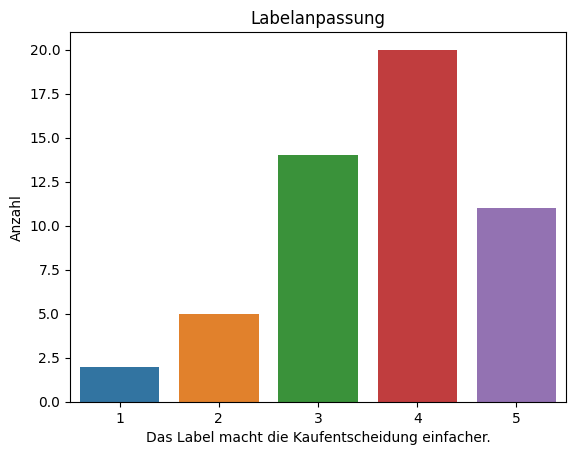

4    20
3    14
5    11
2     5
1     2
Name: T403_08, dtype: int64
Mittelwert: 4.0
Durchschnitt: 3.6346153846153846
Standardabweichung: 1.0484132951301846


In [89]:
values = df['T403_08']
sns.countplot(x=values)
plt.xlabel('Das Label macht die Kaufentscheidung einfacher.')
plt.ylabel('Anzahl')
plt.title("Labelanpassung")
plt.show()
print(values.value_counts())
print("Mittelwert:", statistics.median(values))
print("Durchschnitt:", statistics.mean(values))
print("Standardabweichung:", statistics.stdev(values))